# Personal Loan Campaign
## Problem Statement
AllLife Bank wants to increase the number of customers taking personal loans. Currently, most of its customers only have deposit accounts, and very few have taken loans.

The bank ran a marketing campaign last year, offering personal loans to its deposit customers, and about 9% of them accepted the offer. Now, the bank wants to improve its targeting strategy to increase the success rate of future campaigns.

As a Data Scientist, my goal is to build a model that predicts which customers are most likely to take a personal loan. This will help the marketing team focus on the right customers, improving efficiency and increasing loan sales.

### Data Dictionary 

ID: Unique Customer ID (Not useful for modeling)

Age: Customer’s age in completed years

Experience: Number of years of professional experience

Income: Annual income of the customer (in thousand dollars)

ZIP Code: Customer's home address ZIP code (Not useful for modeling)

Family: Family size of the customer

CCAvg: Average monthly spending on credit cards (in thousand dollars)

Education: Education level (1 = Undergrad, 2 = Graduate, 3 = Advanced/Professional)

Mortgage: Value of house mortgage (in thousand dollars)

Personal_Loan: Target variable (1 = Accepted Loan, 0 = Did Not Accept Loan)

Securities_Account: Does the customer have a securities account with the bank? (1 = Yes, 0 = No)

CD_Account: Does the customer have a certificate of deposit (CD) account? (1 = Yes, 0 = No)

Online: Does the customer use internet banking? (1 = Yes, 0 = No)

CreditCard: Does the customer use a credit card from another bank? (1 = Yes, 0 = No)

In [1]:
# conda create --name gl python=3.11
# conda activate gl

# Install the required libraries
!pip install -U pandas numpy matplotlib seaborn scikit-learn

# Import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

In [2]:
df = pd.read_csv('./data/Loan_Modelling.csv')
df.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


# 1. Define the problem and perform an Exploratory Data Analysis
- Problem definition, 
- Data background and contents 
- Univariate analysis 
- Bivariate analysis 
- Key meaningful observations for each of the plot

### Problem definition

Build a model that predicts whether a customer will accept a personal loan offer based on their attributes. Need to find out key factors (income, family size, education, etc.) influence loan acceptance also any specific customer segments to focus or not  etc.

In [3]:
print("Shape:", df.shape)
print("--------------------------------")


print(f"Total number of rows: {df.shape[0]} and total number of columns: {df.shape[1]}")

Shape: (5000, 14)
--------------------------------
Total number of rows: 5000 and total number of columns: 14


In [4]:
print("Data Info:", df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB
Data Info: None


In [5]:
print(df.isnull().sum())
print("--------------------------------")


print(f"There are {df.isnull().sum().sum()} missing values in the data")

ID                    0
Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64
--------------------------------
There are 0 missing values in the data


###  Data background and contents
- The dataset contains 5,000 customers with 14 attributes.

- The target variable is Personal_Loan (1 = Accepted, 0 = Rejected).

- Data types: Mostly integers, except CCAvg (float).

- No missing values detected.

### Univariate analysis

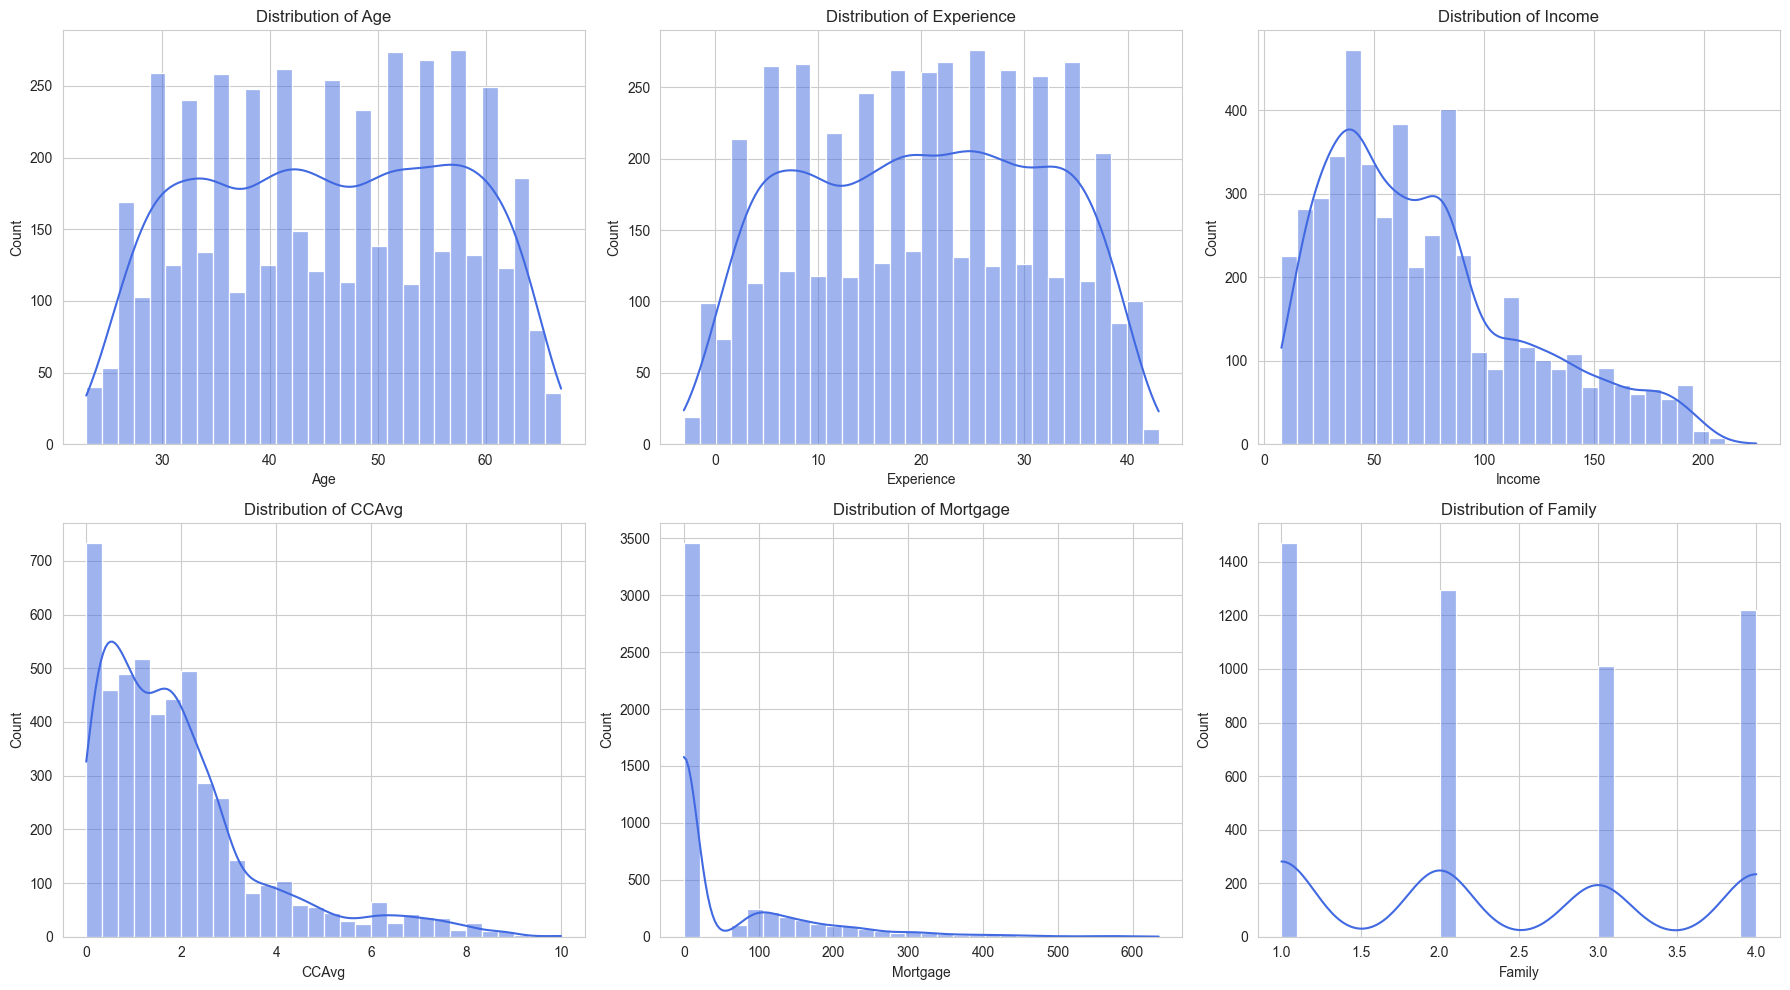

In [6]:
# Set plot style
sns.set_style("whitegrid")

# Define numerical columns
numerical_cols = ["Age", "Experience", "Income", "CCAvg", "Mortgage", "Family"]

# Plot histograms for numerical variables
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.ravel()

for i, col in enumerate(numerical_cols):
    sns.histplot(df[col], bins=30, kde=True, ax=axes[i], color="royalblue")
    axes[i].set_title(f"Distribution of {col}")

plt.tight_layout()
plt.show()

#### Important Observations

- Age & Experience distributions are fairly normal, with most customers between 30-60 years
- Income is right skewed, more customers have lower incomes
- CCAvg is right skewed, more customers spend less than 5,000 per month, but a few spend much more
- Mortgage is heavily right skewed, maximum customers has no loan

### Bivariate analysis

/var/folders/nr/sqm56qvn4nlgh0l0prrbcy940000gn/T/ipykernel_1168/3515278396.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Personal_Loan", y=df[col], data=df, ax=axes[i], palette="coolwarm")
/var/folders/nr/sqm56qvn4nlgh0l0prrbcy940000gn/T/ipykernel_1168/3515278396.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Personal_Loan", y=df[col], data=df, ax=axes[i], palette="coolwarm")
/var/folders/nr/sqm56qvn4nlgh0l0prrbcy940000gn/T/ipykernel_1168/3515278396.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Personal_Loan", y=df[

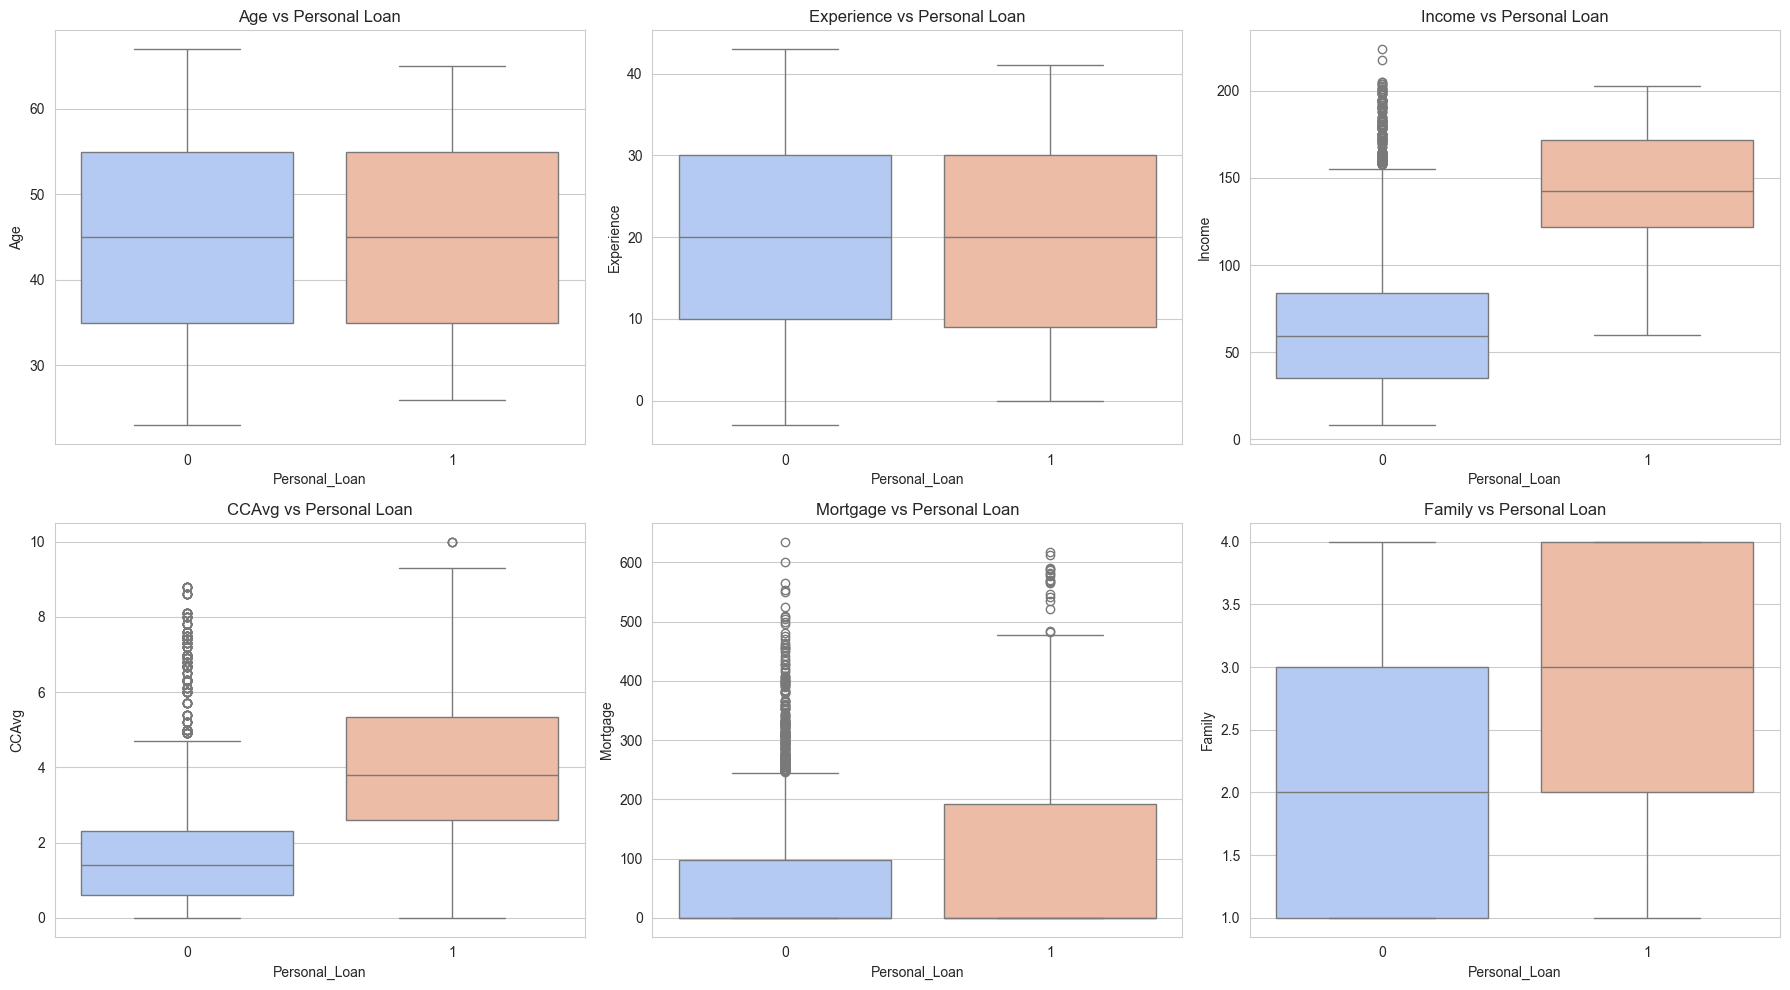

In [7]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.ravel()

for i, col in enumerate(numerical_cols):
    sns.boxplot(x="Personal_Loan", y=df[col], data=df, ax=axes[i], palette="coolwarm")
    axes[i].set_title(f"{col} vs Personal Loan")

plt.tight_layout()
plt.show()

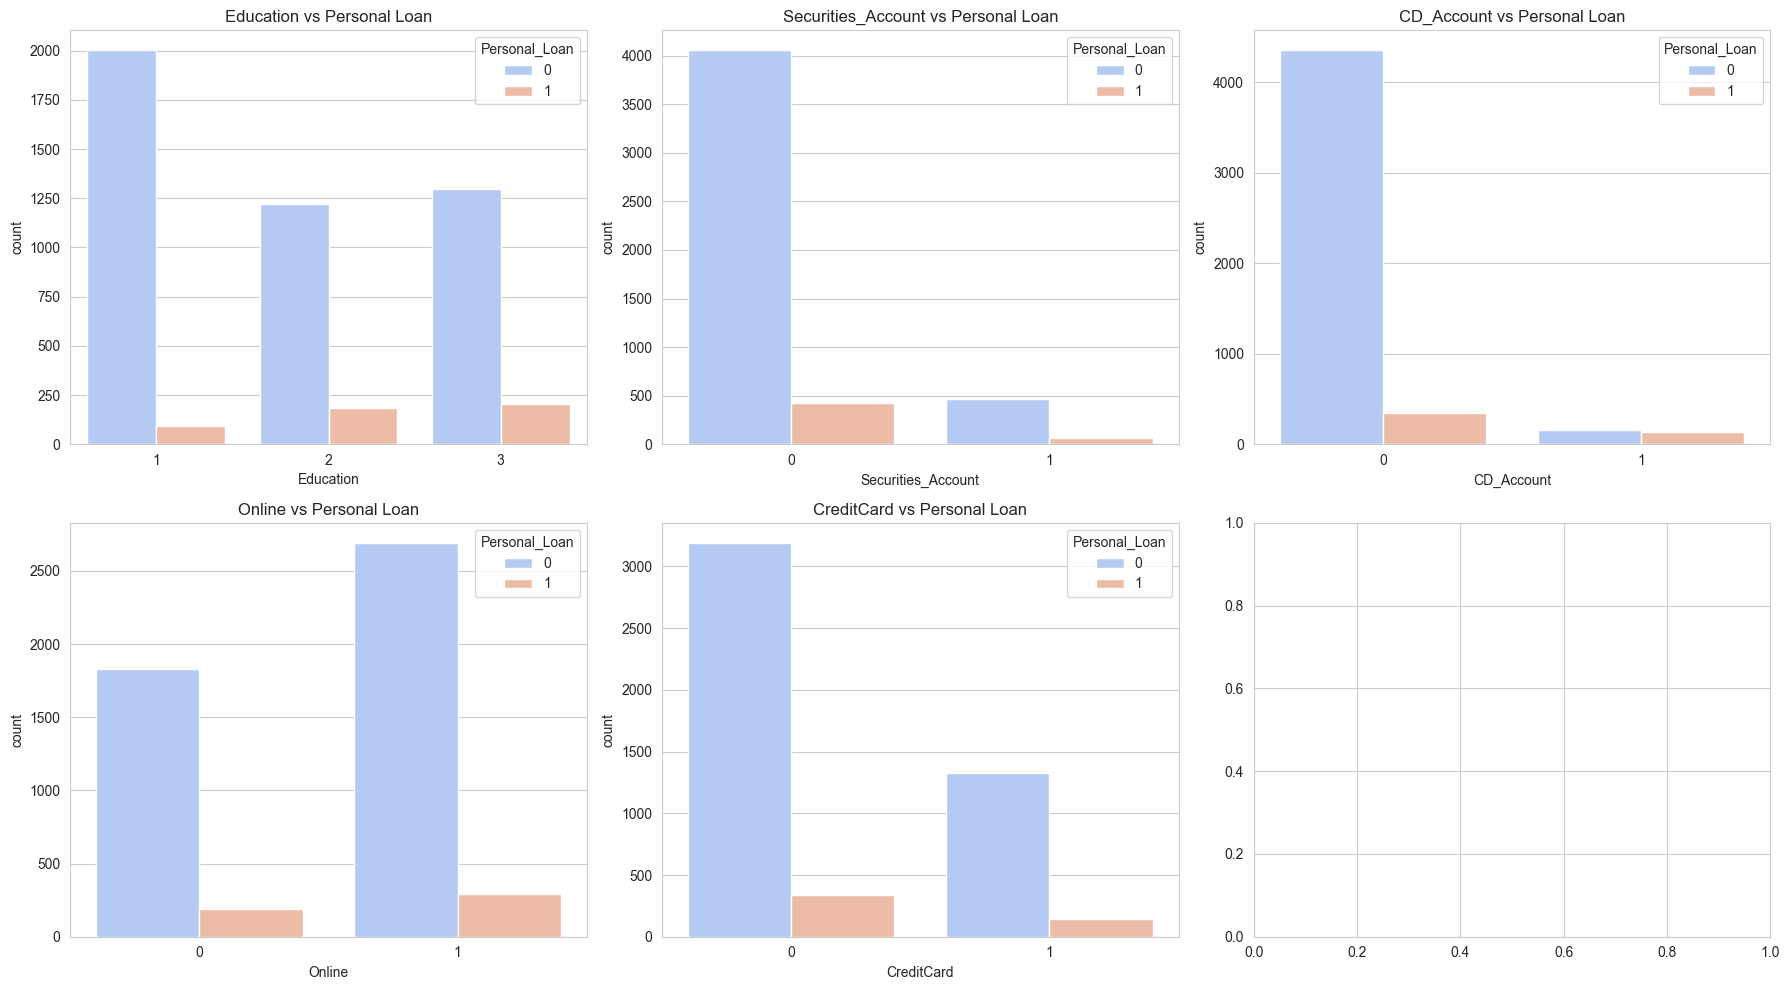

In [8]:
categorical_cols = ["Education", "Securities_Account", "CD_Account", "Online", "CreditCard"]

# Plot categorical variable distributions
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.ravel()

for i, col in enumerate(categorical_cols):
    sns.countplot(x=col, hue="Personal_Loan", data=df, palette="coolwarm", ax=axes[i])
    axes[i].set_title(f"{col} vs Personal Loan")

plt.tight_layout()
plt.show()

#### Important Observations

#####  Numerical
- higher income people has more loan 
- Loan takers spend more on credit cards
- smaller families (1-2 members) has more loan

#####  Categorical
- higher education levels (Graduate & Advanced) has more loan compared to others
- Customers without a securities account are more likely to take a loan  compared to others
- Customers with a CD account have a much higher likelihood of accepting a loan   compared to others
- Higher loan acceptance among online banking users compared to others
- Customers with external credit cards are more likely to accept a loan  compared to others

### Key meaningful observations

✅ Higher Income, Higher Credit Card Spending, and Higher Education are strong indicators of loan acceptance.

✅ Customers with a CD account are much more likely to accept a loan.

✅ Family size, mortgage, and securities accounts show weaker relationships.

# 2. Data pre-processing

- Missing Value Treatment (if needed) 
- Outlier Detection (treat, if needed) 
- Feature Engineering 
- Data preparation for modelling


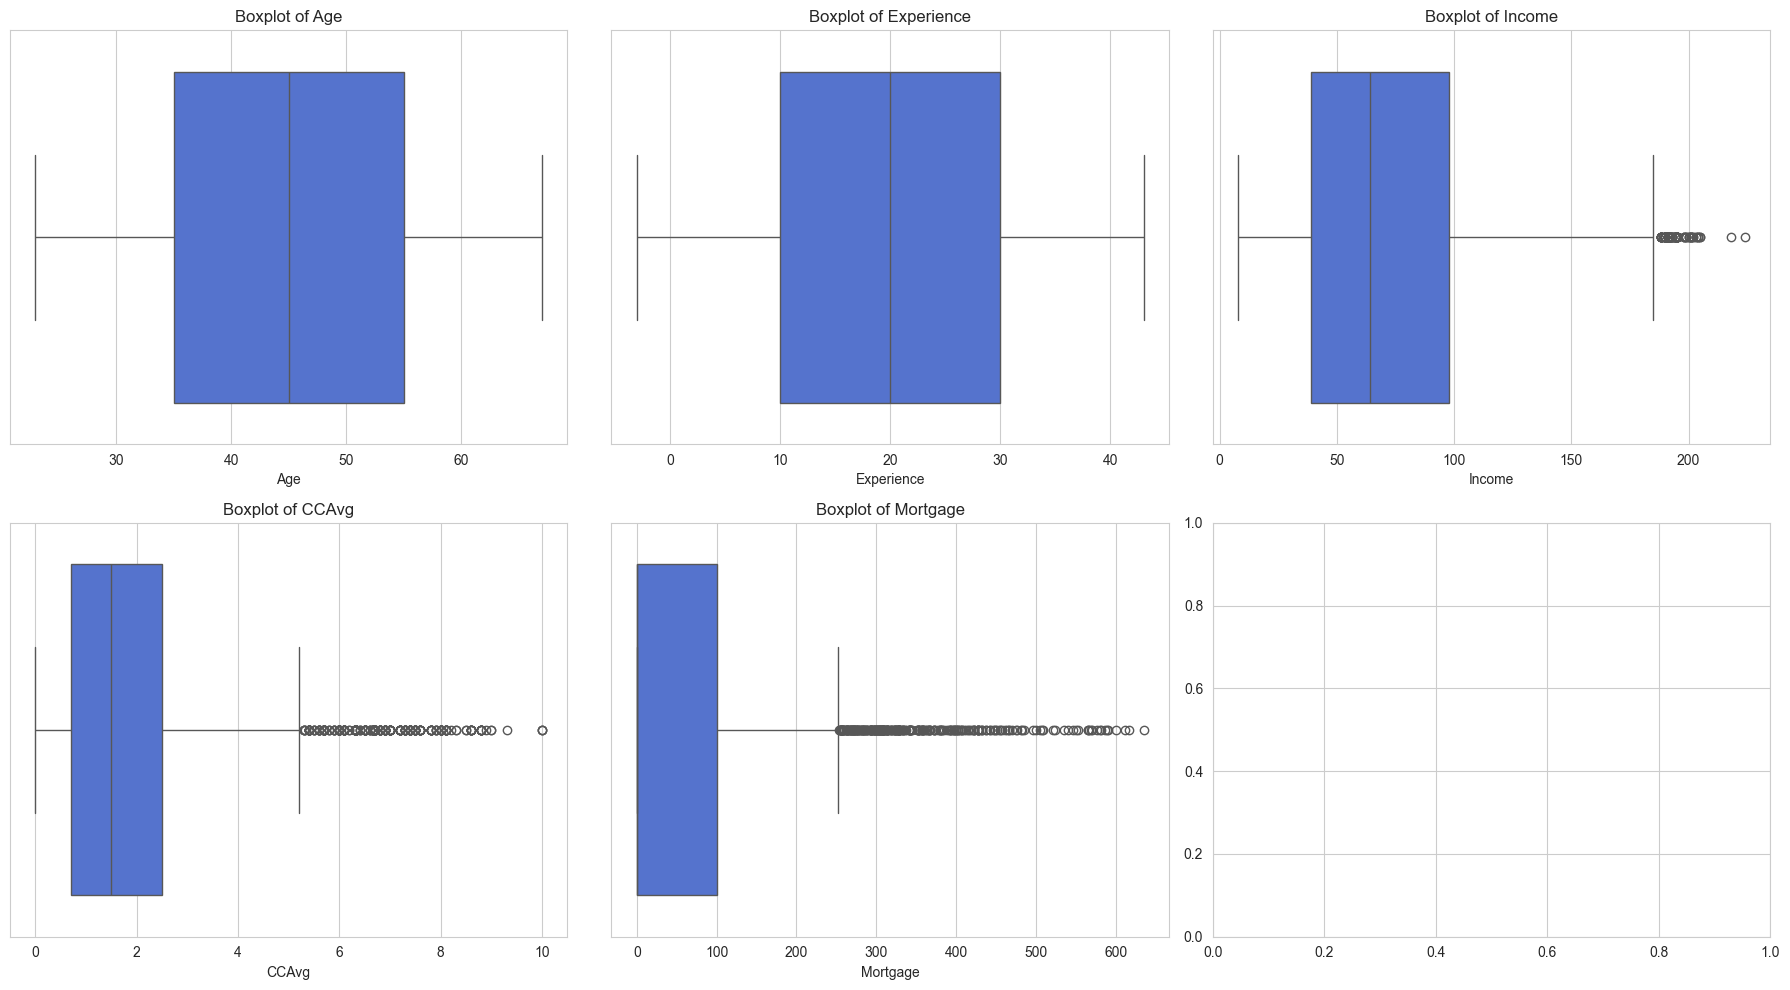

ID                    0
Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

In [9]:
# Check for missing values
missing_values = df.isnull().sum()

# Check for outliers using boxplots
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.ravel()

numerical_cols = ["Age", "Experience", "Income", "CCAvg", "Mortgage"]
for i, col in enumerate(numerical_cols):
    sns.boxplot(x=df[col], ax=axes[i], color="royalblue")
    axes[i].set_title(f"Boxplot of {col}")

plt.tight_layout()
plt.show()

# Display missing values summary
missing_values

In [10]:
# Check for outliers using IQR method
Q1 = df[numerical_cols].quantile(0.25)
Q3 = df[numerical_cols].quantile(0.75)
IQR = Q3 - Q1

# Define outlier thresholds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = ((df[numerical_cols] < lower_bound) | (df[numerical_cols] > upper_bound)).sum()

# Display the number of outliers in each column
outliers

Age             0
Experience      0
Income         96
CCAvg         324
Mortgage      291
dtype: int64

### Key meaningful observations

- No missing values in the dataset, so no imputation is needed.
- High number of outliers in Income and CCAvg, indicating that some customers have extremely high-income or high-spending.
- Mortgage has many zero values, which could indicate customers without mortgages.


### Feature Engineering 

In [11]:
# Cap extreme outliers at the 99th percentile
cap_values = df[numerical_cols].quantile(0.99)

df["Income"] = df["Income"].clip(upper=cap_values["Income"])
df["CCAvg"] = df["CCAvg"].clip(upper=cap_values["CCAvg"])
df["Mortgage"] = df["Mortgage"].clip(upper=cap_values["Mortgage"])

df[numerical_cols].max()

Age            67.00
Experience     43.00
Income        193.00
CCAvg           8.00
Mortgage      431.01
dtype: float64

In [12]:
df = df.drop(columns=["ID", "ZIP Code"], errors="ignore") # Drop ID and ZIP Code columns
df = pd.get_dummies(df, columns=["Education", "Securities_Account", "CD_Account", "Online", "CreditCard"], drop_first=True) # Encode categorical variables
df.head()

,Age,Experience,Income,ZIPCode,Family,CCAvg,Mortgage,Personal_Loan,Education_2,Education_3,Securities_Account_1,CD_Account_1,Online_1,CreditCard_1
0,25,1,49,91107,4,1.6,0.0,0,False,False,True,False,False,False
1,45,19,34,90089,3,1.5,0.0,0,False,False,True,False,False,False
2,39,15,11,94720,1,1.0,0.0,0,False,False,False,False,False,False
3,35,9,100,94112,1,2.7,0.0,0,True,False,False,False,False,False
4,35,8,45,91330,4,1.0,0.0,0,True,False,False,False,False,True


### Data preparation for modelling

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Define features (X) and target (y)
X = df.drop(columns=["Personal_Loan"])
y = df["Personal_Loan"]

# 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale numerical features
scaler = StandardScaler()
num_cols = ["Age", "Experience", "Income", "CCAvg", "Mortgage", "Family"]
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

X_train.head()

,Age,Experience,Income,ZIPCode,Family,CCAvg,Mortgage,Education_2,Education_3,Securities_Account_1,CD_Account_1,Online_1,CreditCard_1
408,1.268346,1.374394,0.337623,91745,-0.332080,0.514001,-0.566463,False,False,False,False,True,False
3737,-0.124436,-0.104033,-0.940822,91423,-1.201969,-0.824210,-0.566463,False,True,False,False,True,False
3889,-1.691316,-1.756393,-1.179176,93014,-1.201969,-1.056942,0.676927,True,False,False,False,True,False
568,-0.994925,-0.973697,-0.702468,92101,-0.332080,-1.056942,1.087965,False,False,False,False,True,True
1041,0.920150,1.026529,-0.485782,92780,1.407697,-0.242379,-0.566463,False,False,False,False,False,False


# 3. Model building - Decision Tree

- Define model evaluation criterion 
- Build the model and comment on the model performance. 
- Visualize the decision rules and important features

#### Model Evaluation Criterion

Since this is a binary classification problem, we will evaluate the model using Accuracy, Precision, Recall, F1-score,  and Confusion Matrix

Focus on high recall because the bank wants to identify as many potential loan takers as possible while minimizing false positives.

#### Model Building (Decision Tree)

In [14]:
# Train Decision Tree model
dt_model = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_model.fit(X_train, y_train)

# Make predictions
y_train_pred = dt_model.predict(X_train)
y_test_pred = dt_model.predict(X_test)

# Evaluate performance
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
classification_rep = classification_report(y_test, y_test_pred)
conf_matrix = confusion_matrix(y_test, y_test_pred)

# Display results
train_accuracy, test_accuracy, classification_rep, conf_matrix

(0.98875,
 0.985,
 '              precision    recall  f1-score   support\n\n           0       1.00      0.99      0.99       904\n           1       0.89      0.96      0.92        96\n\n    accuracy                           0.98      1000\n   macro avg       0.94      0.97      0.96      1000\nweighted avg       0.99      0.98      0.99      1000\n',
 array([[893,  11],
        [  4,  92]]))

#### Model Performance Evaluation

✅ Training Accuracy: 98.88%
✅ Test Accuracy: 98.5%


Confusion Matrix
- 893 True Negatives
- 92 True Positives
- 11 False Positives
- 4 False Negatives

#### Visualizing Decision Rules

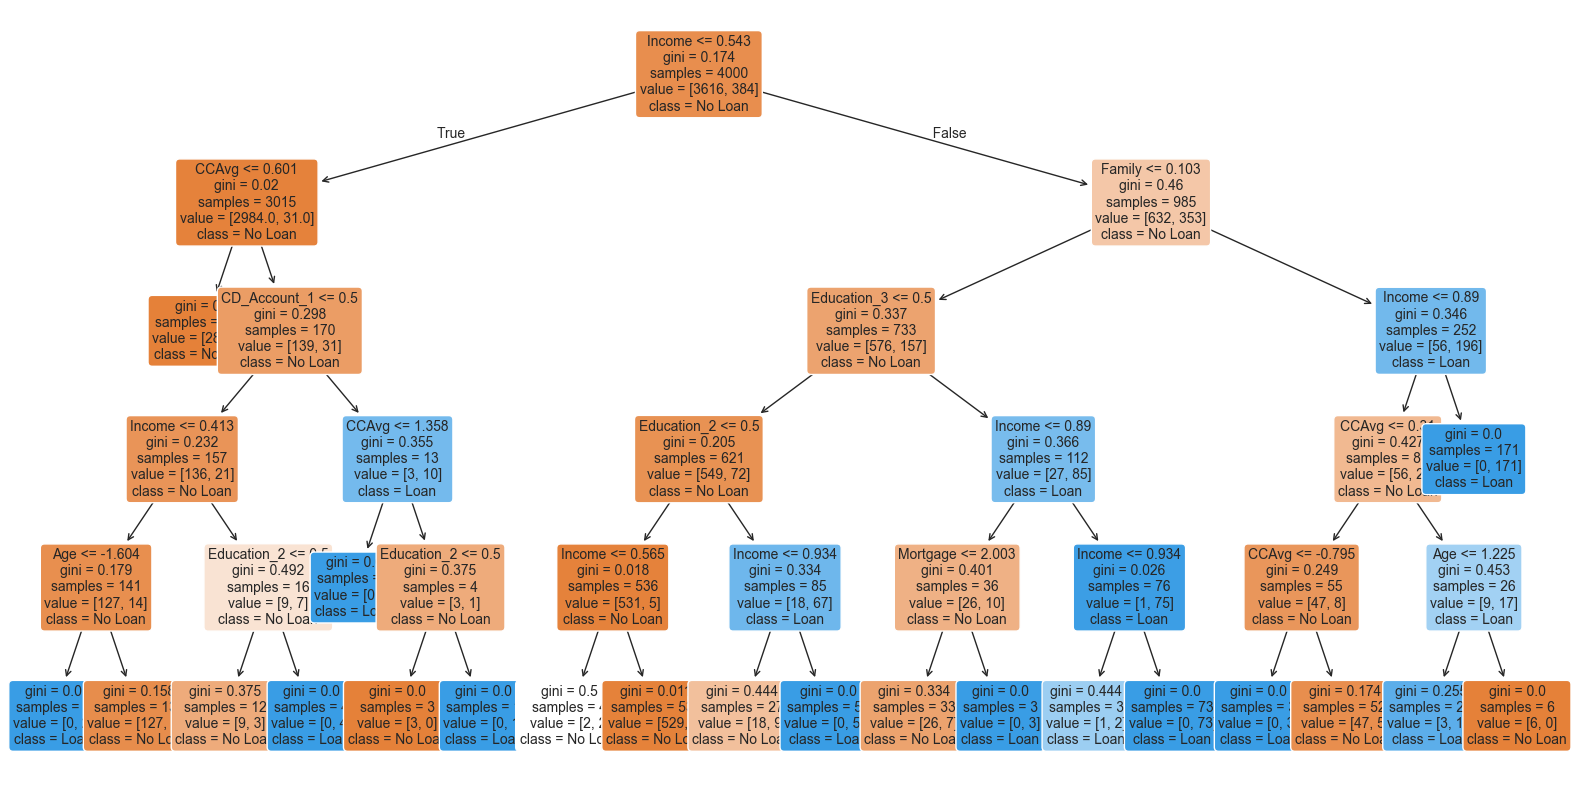

In [15]:
plt.figure(figsize=(20, 10))
plot_tree(dt_model, feature_names=X.columns, class_names=["No Loan", "Loan"], filled=True, rounded=True, fontsize=10)
plt.show()

#### Important Features

/var/folders/nr/sqm56qvn4nlgh0l0prrbcy940000gn/T/ipykernel_1168/3410897821.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances[sorted_idx], y=feature_names[sorted_idx], palette="viridis")


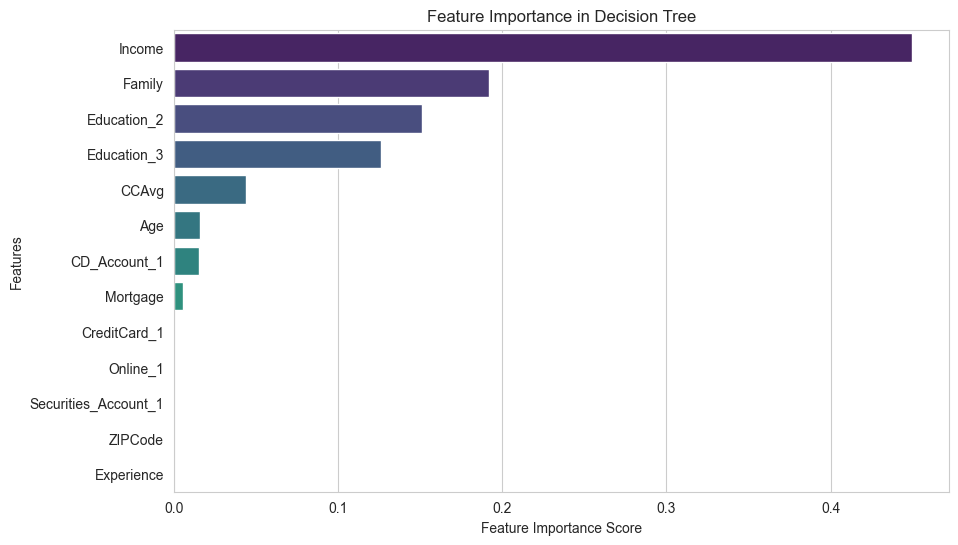

In [16]:
importances = dt_model.feature_importances_
feature_names = X.columns

sorted_idx = importances.argsort()[::-1]

plt.figure(figsize=(10, 6))
sns.barplot(x=importances[sorted_idx], y=feature_names[sorted_idx], palette="viridis")
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance in Decision Tree")
plt.show()

##### Higher-income customers with higher spending habits are more likely to take loans.

# 4. Model Performance Evaluation and Improvement

- Try and improve the model performance by pruning (Both Post and Pre pruning) 
- Check the performance of the pruned models, compare the performance of all the models built, and select the final model 
- Find the decision rules and check feature importance for the final model

In [21]:
# Pre-Pruned Model

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

pre_pruned_model = DecisionTreeClassifier(max_depth=4, min_samples_split=50, min_samples_leaf=25, random_state=42)
pre_pruned_model.fit(X_train, y_train)

y_pred_pre_pruned = pre_pruned_model.predict(X_test)
pre_pruned_accuracy = accuracy_score(y_test, y_pred_pre_pruned)

print("Pre-Pruned Model Accuracy:", pre_pruned_accuracy)

Pre-Pruned Model Accuracy: 0.978


In [22]:
# Post-Pruned Model

unpruned_model = DecisionTreeClassifier(random_state=42)
unpruned_model.fit(X_train, y_train)

ccp_path = unpruned_model.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = ccp_path.ccp_alphas  # List of alpha values

pruned_models = [DecisionTreeClassifier(random_state=42, ccp_alpha=alpha).fit(X_train, y_train) for alpha in ccp_alphas]
pruned_accuracies = [accuracy_score(y_test, model.predict(X_test)) for model in pruned_models]
best_alpha = ccp_alphas[pruned_accuracies.index(max(pruned_accuracies))]

post_pruned_model = DecisionTreeClassifier(random_state=42, ccp_alpha=best_alpha)
post_pruned_model.fit(X_train, y_train)

y_pred_post_pruned = post_pruned_model.predict(X_test)
post_pruned_accuracy = accuracy_score(y_test, y_pred_post_pruned)

print("Post-Pruned Model Accuracy:", post_pruned_accuracy)
print("Best Alpha for Pruning:", best_alpha)


Post-Pruned Model Accuracy: 0.988
Best Alpha for Pruning: 0.0022814857981524658


In [23]:
# Compare the performance of all models
models = {
    "Original Tree": dt_model,
    "Pre-Pruned Tree": pre_pruned_model,
    "Post-Pruned Tree": post_pruned_model
}

for name, model in models.items():
    y_pred = model.predict(X_test)
    print(f"{name} Accuracy: {accuracy_score(y_test, y_pred):.4f}")


Original Tree Accuracy: 0.9850
Pre-Pruned Tree Accuracy: 0.9780
Post-Pruned Tree Accuracy: 0.9880


/var/folders/nr/sqm56qvn4nlgh0l0prrbcy940000gn/T/ipykernel_1168/3165820012.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances[sorted_idx], y=feature_names[sorted_idx], palette="viridis")


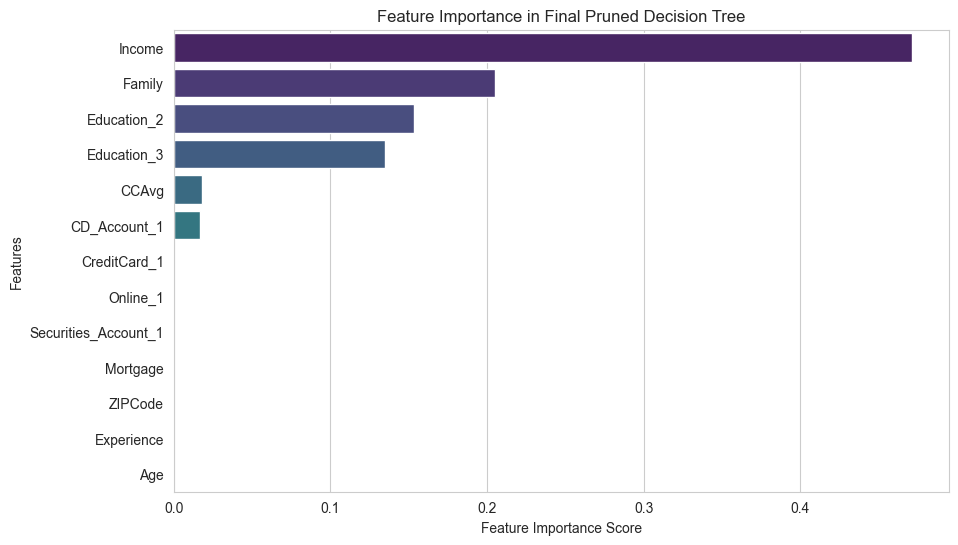

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

importances = post_pruned_model.feature_importances_
feature_names = X.columns

sorted_idx = importances.argsort()[::-1]
plt.figure(figsize=(10, 6))
sns.barplot(x=importances[sorted_idx], y=feature_names[sorted_idx], palette="viridis")
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance in Final Pruned Decision Tree")
plt.show()


#### Post-pruned model has the highest accuracy (98.80%)

# 5. Actionable Insights & Recommendations

- Conclude with the key takeaways for the marketing team 
- What would your advice be on how to do this campaign?

### Key takeaways for the marketing team 

✅ High-Income Customers Are More Likely to Take Loans

✅ Credit Card Usage Is a Strong Indicator

✅ CD Account Holders Are Prime Loan Targets

✅ Online Banking Users Are More Likely to Take Loans

### Advice be on how to do this campaign?

To make the loan campaign successful, the bank should focus on customers who are most likely to take a loan. High-income customers and those who spend a lot on credit cards are the best targets. Customers with a CD account are also good candidates since they trust the bank and may be open to loan offers.